In [4]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import rc
import statsmodels.api as sm

In [5]:
zip_data = "Project1_State_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [6]:
zip_data_df["Total No HS Diploma"] = zip_data_df["Total No HS Diploma"].astype(float)
zip_data_df["Total HS Diploma"] = zip_data_df["Total HS Diploma"].astype(float)
zip_data_df["Total College Degrees"] = zip_data_df["Total College Degrees"].astype(float)
zip_data_df = zip_data_df.dropna()

In [7]:
# create a new df containing all numeric columns
state_data_numeric = zip_data_df[["Total No HS Diploma", "Total HS Diploma", "Total College Degrees"]]

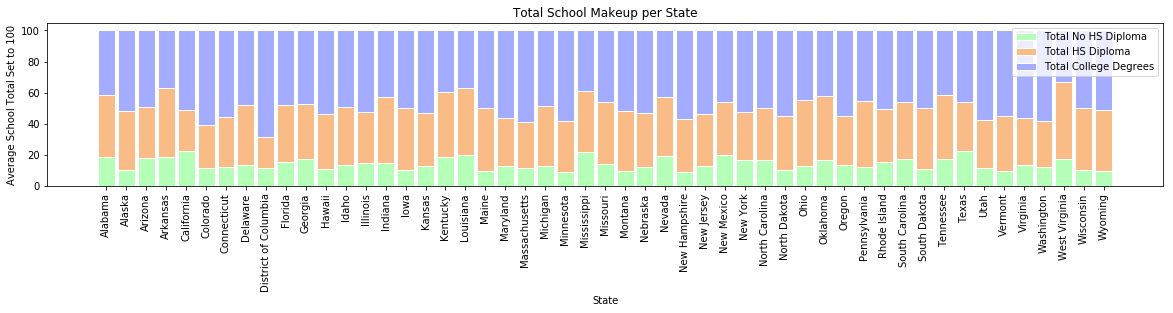

In [8]:
# Data
r = zip_data_df['State']
raw_data = {'greenBars': state_data_numeric['Total No HS Diploma'], 'orangeBars': state_data_numeric['Total HS Diploma'],\
            'blueBars': state_data_numeric['Total College Degrees']}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
plt.figure(figsize=(20,3))
barWidth = 0.85
names = zip_data_df['State']
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label= "Total No HS Diploma")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label= 'Total HS Diploma')
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label= 'Total College Degrees')
 
# Custom x axis
plt.title("Total School Makeup per State")
plt.xlabel("State")
plt.ylabel("Average School Total Set to 100")
plt.xticks(r, names, rotation="vertical")

# Create a legend for the chart
plt.legend(loc="best")

# Show graphic
#plt.show()

plt.savefig("./Presentation_Visuals/TotalStateSchooling.png")

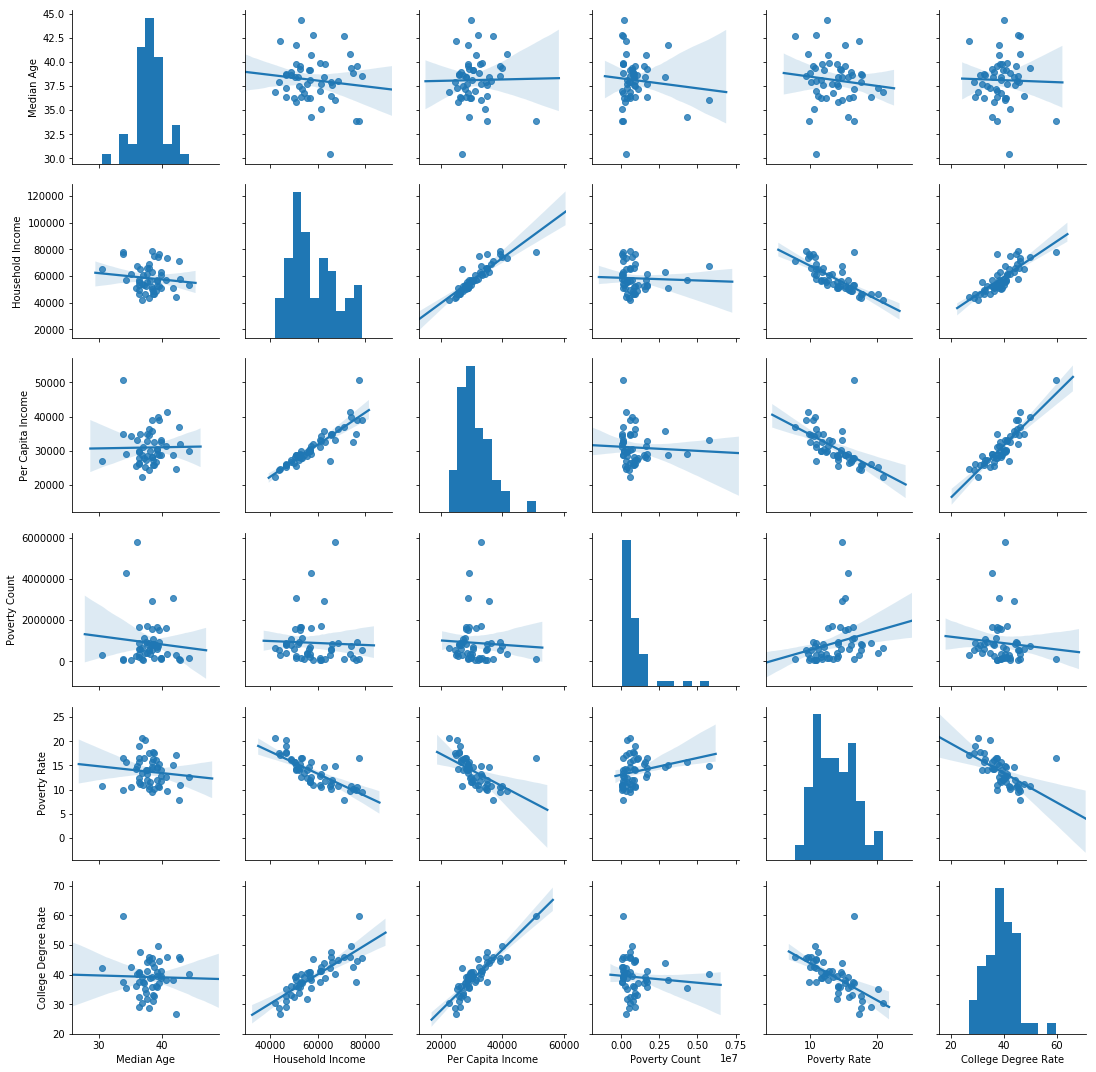

In [9]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                            "Poverty Count", "Poverty Rate", "College Degree Rate"]]

# seaborn pair plot
sns.pairplot(census_data_numeric, kind="reg")

In [10]:
# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No High School Diploma Rate"] = zip_data_df["No High School Diploma Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric2 = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                            "Poverty Count", "Poverty Rate", "No High School Diploma Rate"]]

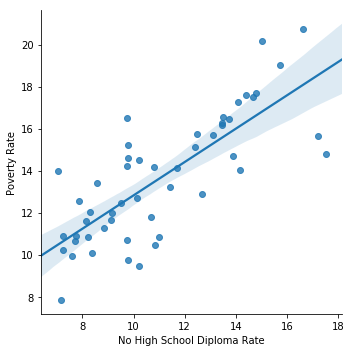

In [11]:
#scatterplot with regression analysis 
sns.lmplot(y='Poverty Rate', x='No High School Diploma Rate', data=census_data_numeric2)

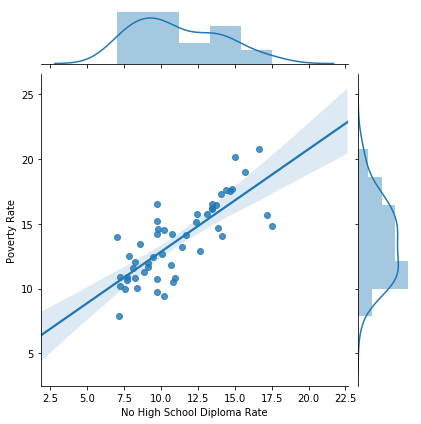

In [12]:
#better visual of the bell curve for rvalue 
sns.jointplot(y='Poverty Rate', x='No High School Diploma Rate', data=census_data_numeric2, kind="reg");

In [13]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No High School Diploma Rate"] = zip_data_df["No High School Diploma Rate"].astype(float)

In [14]:
# create a new df containing all numeric columns
nohsstate_data_numeric = zip_data_df[["Poverty Rate", "No High School Diploma Rate"]]

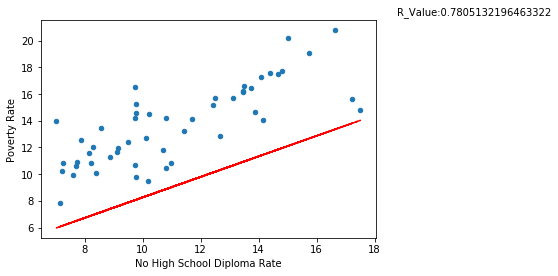

In [15]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(nohsstate_data_numeric["Poverty Rate"], nohsstate_data_numeric["No High School Diploma Rate"])
fit = slope * nohsstate_data_numeric["No High School Diploma Rate"] + intercept

nohsstate_data_numeric.plot.scatter(x="No High School Diploma Rate", y="Poverty Rate")
plt.plot(nohsstate_data_numeric["No High School Diploma Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

plt.savefig("./Presentation_Visuals/NoHSstatePovertyratervalue.png")

In [16]:
#another line of code to check that r-value is correct/ same as above
nohsstate_data_numeric['No High School Diploma Rate'].corr(nohsstate_data_numeric['Poverty Rate'])

0.7805132196463324

In [17]:
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

In [18]:
collegestate_data_numeric = zip_data_df[["Per Capita Income", "College Degree Rate"]]

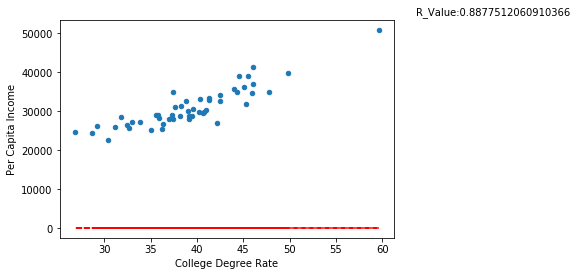

In [19]:
# use linear regression to fit percapita income and college degree  
(slope, intercept, r_value, _, _) = linregress(collegestate_data_numeric["Per Capita Income"], collegestate_data_numeric["College Degree Rate"])
fit = slope * collegestate_data_numeric["College Degree Rate"] + intercept

collegestate_data_numeric.plot.scatter(x="College Degree Rate", y="Per Capita Income")
plt.plot(collegestate_data_numeric["College Degree Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

plt.savefig("./Data/collegestatepercapitarate.png")

In [20]:
#another line of code to make sure that my r-value matches what was calculated above
collegestate_data_numeric['College Degree Rate'].corr(collegestate_data_numeric['Per Capita Income'])

0.8877512060910366

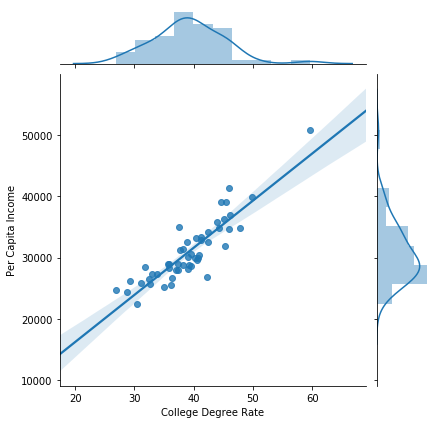

In [21]:
#bell curve better visualization of correlation between college degrees and per capita 
sns.jointplot(y='Per Capita Income', x='College Degree Rate', data=census_data_numeric, kind="reg");

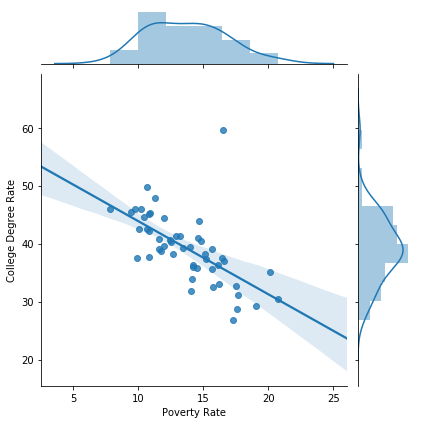

In [23]:
sns.jointplot(y='College Degree Rate', x='Poverty Rate', data=census_data_numeric, kind="reg");